# Lab 5 Report
Qinchen Lin

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [3]:
higgsdata = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs_dict = pickle.load(higgsdata)
qcddata = open("qcd_100000_pt_250_500.pkl",'rb')
qcd_dict = pickle.load(qcddata)
higgs_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

# Introduction 

"A search for the decay of the Standard Model Higgs boson into a bb¯ pair when produced in
association with a W or Z boson is performed with the ATLAS detector. The data, corresponding to an integrated luminosity of 79.8 fb−1 were collected in proton–proton collisions
during Run 2 of the Large Hadron Collider at a centre-of-mass energy of 13 TeV. For a Higgs
boson mass of 125 GeV, an excess of events over the expected background from other Standard Model processes is found with an observed (expected) significance of 4.9 (4.3) standard
deviations." ---From ATLAS "Observation of H → bb¯ decays and V H production with the ATLAS detector."

# Higgs and QCD

For our signal, the Higgs decays to a pair of buttom quarks and each form a jet. During QCD process, outgoing particles also form jets. The goal is to discriminate our signal Higgs jet from QCD background jet by comparing the information for different variables and choose a proper threshhold for selecting signal.

# Reference Axis

The direction of the outgoing beam(proton) is chosen to be the possitive z-axis. The y-axis and x-axis follow the right hand rule. 

# Pseudorapidity, 'eta' and Azimuthal Angle, 'phi'

After constructing the reference axis, the azimuthal angle phi is said to be the angle between jet direction and the x-axis, which is in the unit of radian. And the pseudo-rapidity is in the form of -ln(tan(theta/2)) where the theta is the angle between z-axis and the direction of jet.

# Eta - phi Space

Now we can construct a Eta-phi space. In this space, the direction of outgoing particle can be represented as a point. The angular distance is the distance between two points. So if particles that travel in the same direction, they will be close to each other in eta-phi space.

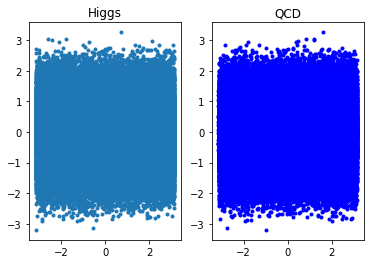

In [37]:
# Make the plot of data in Eta-phi space

fig, axs = plt.subplots(1, 2)
axs[0].set_xlabel = ('phi')
axs[0].plot(higgs_dict['phi'], higgs_dict['eta'], '.')
axs[0].set_title('Higgs')
axs[1].plot(qcd_dict['phi'], higgs_dict['eta'], '.',color = 'b')
axs[1].set_title('QCD')
plt.show()

The first thing should be noted is that the angle phi and theta is in the range of [-pi, pi] instead of [0, 2pi] in traditional representation. 

From this plot, it's hard to tell the different between the jet for Higgs and QCD background. But it shows that there are more dots has the eta value close to 0 rather than aways from 0. So I decided to make a 2d histogram to see if there exist some specific distribution.

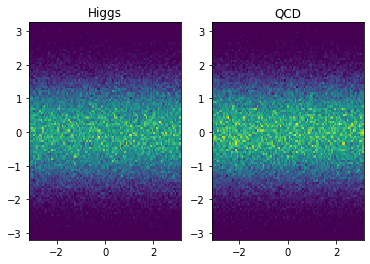

In [27]:
# 2d Histogram for eta and phi

fig1, axs1 = plt.subplots(1, 2)
axs1[0].hist2d(higgs_dict['phi'], higgs_dict['eta'], 100)
axs1[0].set_title('Higgs')
axs1[1].hist2d(qcd_dict['phi'], higgs_dict['eta'], 100)
axs1[1].set_title('QCD')
plt.show()

It's interesting to see that in the 2-d histogram plot for eta and phi, for different values of phi, eta follows a bell-shape distribution.  

# Transverse (xy plane) Momentum, 'pt'


The transverse momentum in the form of p_t = sqrt(p_x ^2 + p_y ^2), which is the momentum that is transversed to xy plan.

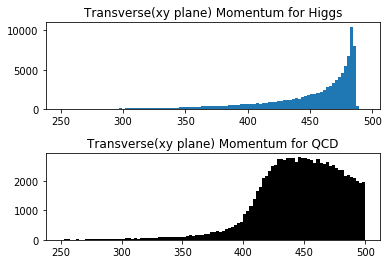

In [7]:
plt.subplots_adjust(hspace = 0.5, wspace = 1)
plt.subplot(2,1,1)
plt.title('Transverse(xy plane) Momentum for Higgs')
plt.hist(higgs_dict['pt'],100)
plt.subplot(2,1,2)
plt.title('Transverse(xy plane) Momentum for QCD')
plt.hist(qcd_dict['pt'],100,color='k')
plt.show()

As we can see in the plots above, the most data for the jet of Higgs has a more concentrated distribution of transverse momentum, the most occurrence is about 480. As for qcf background data, the transverse momentum distribution are more spread-out. The difference between the shape of distribution is useful becuase this information can be used to determin the cut-off threshhold for selecting signal. A good threshhold (by observation and guess without any math) could be about 460.

# Invariant Mass, 'm'

Invariant mass which is in the form M^2 = Sum(Ei^2) - Sum(Pi^2). It is "the portion of the total mass of an object or system of objects that is independent of the overall motion of the system." (From WIKIPEDIA) 

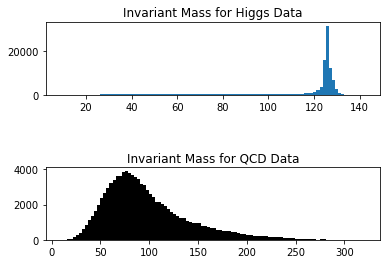

In [39]:
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.title('Invariant Mass for Higgs Data')
plt.hist(higgs_dict['mass'], 100)
plt.subplot(2,1,2)
plt.title('Invariant Mass for QCD Data')
plt.hist(qcd_dict['mass'], 100,color='k')
plt.show()

From the graph we can tell that for the invariant mass of Higgs data, the distribution concentrates to a relatively small region (120-130), while the data for qcd background is more spread-out with the most occurance appears to be around 60. This is a useful information because the most m value of higgs data are greater than 120, but a large potion of the qcd data are not. This information can be used to develop a method or significant value to discriminate Higgs from QCD background.

# Energy Correlation Functions, and the ratio, 'ee2', 'ee3', 'd2'

Energy Correlation Funcitons ratio is in the form of ee2 = sum(pt_i * pt_j * (delta R_ij)^b) where i<j belongs to jet. And the beta is the weight of the angular separation of the jet constituents. The delta R_ij is the distance between two jet constituents. 

Similarly, ee3 = sum(pt_i * pt_j * pt_k) * (delta R_ij * delta R _jk * delta R_ik)^b )

d2 is 3-to-2 Point ECF ratio which is in the form of ee3/(ee2)^3

It's really convenient to use the energy correlation function because it does not require a choice of reference axes. 

# "N - subjetiness" Jet Shape Variables , 't1', 't2','t3'

For signal data, a higgs boson decays to a bottom quarks pair and each of the quarks form a jet. However, if the Higgs boson has a really large momentum, the two jets will have simular direction. As a result, they appear as sigle jet when we cluster the resultant particles. 

The "N - subjetiness" Jet Shape Variables can help us to determine "what degree the substructure of a given jet J
is compatible with being composed of N or fewer subjets."(From EUROPEAN ORGANISATION FOR NUCLEAR RESEARCH (CERN))